In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay
from sklearn import metrics

In [2]:
data = pd.read_csv('./Titanic-Dataset.csv')
print(data.shape)
data.head(8)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


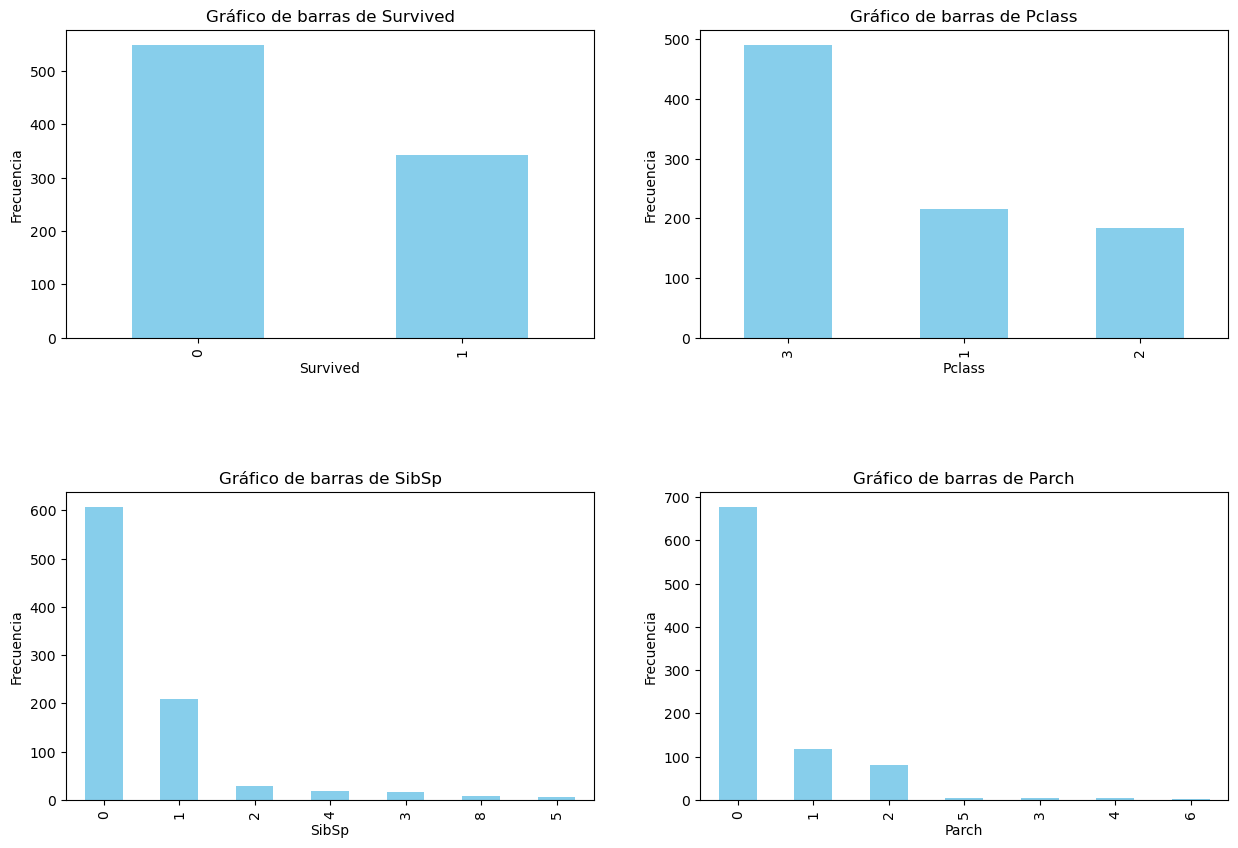

In [5]:
columns_to_plot = ['Survived', 'Pclass', 'SibSp', 'Parch']

num_cols = len(columns_to_plot)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Gráfico de barras de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

if num_cols % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

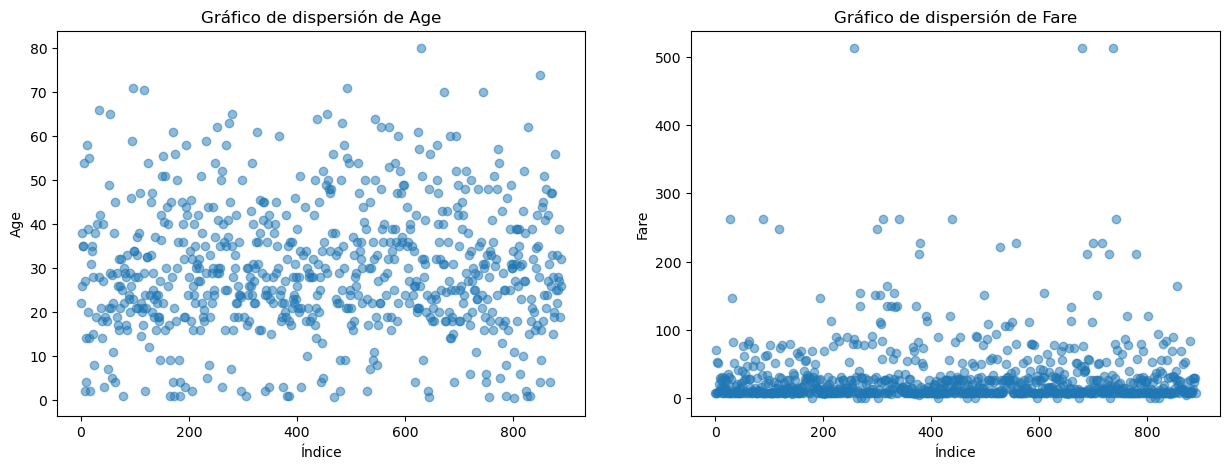

In [6]:
columns_to_plot = ['Age', 'Fare']

num_cols = len(columns_to_plot)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.scatter(data.index, data[col], alpha=0.5)
    ax.set_title(f'Gráfico de dispersión de {col}')
    ax.set_xlabel('Índice')
    ax.set_ylabel(col)

if num_cols % 2 != 0:
    fig.delaxes(axes[-1])

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = data.drop(columns=['Cabin'])
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
data = data.drop(columns=['Embarked'])

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [12]:
sex_mapping = {'male': 0, 'female': 1}

data['Sex'] = data['Sex'].map(sex_mapping)

In [13]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
relevant_columns = ['Survived','Pclass', 'Age', 'Sex', 'Fare']
relevant_columns = data.loc[:, relevant_columns]

relevant_columns.head()

,Survived,Pclass,Age,Sex,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,1,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500


In [15]:
X = relevant_columns.drop('Survived',axis=1) 
Y = relevant_columns['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=0)

In [16]:
print(X_train)

     Pclass   Age  Sex     Fare
671       1  31.0    0  52.0000
417       2  18.0    1  13.0000
634       3   9.0    1  27.9000
323       2  22.0    1  29.0000
379       3  19.0    0   7.7750
..      ...   ...  ...      ...
131       3  20.0    0   7.0500
490       3  25.0    0  19.9667
528       3  39.0    0   7.9250
48        3  25.0    0  21.6792
80        3  22.0    0   9.0000

[668 rows x 4 columns]


In [17]:
logi_reg_model = LogisticRegression(solver='liblinear')

logi_reg_model.fit(X_train,Y_train)

prediccion =logi_reg_model.predict(X_test)


In [18]:
print(prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


In [19]:
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.77      0.66      0.71        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



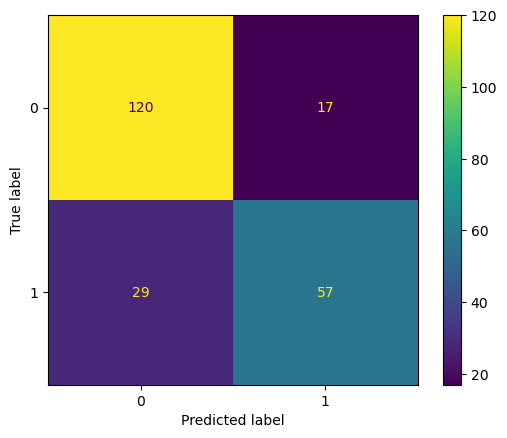

In [20]:
cm = confusion_matrix(Y_test,prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

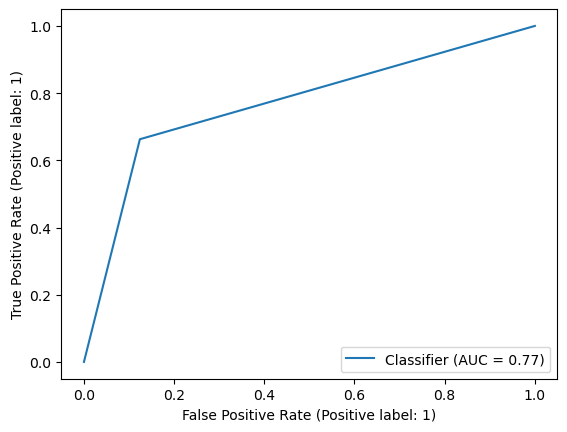

In [21]:
RocCurveDisplay.from_predictions(Y_test,prediccion)
plt.show()